<a href="https://colab.research.google.com/github/345ishaan/ControlNet-Video/blob/main/ControlNet_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q diffusers==0.14.0 transformers xformers git+https://github.com/huggingface/accelerate.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.1 MB/s eta 0:00:00


In [2]:
!pip install -q opencv-contrib-python
!pip install -q controlnet_aux

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.0 MB/s eta 0:00:00


In [27]:
import requests
import urllib.request
import cv2
from PIL import Image

In [4]:
#@title Download Video Data
messi_celeb_masked_path = 'https://github.com/345ishaan/ControlNet-Video/blob/main/messi_celeb_masked.mp4?raw=true'
messi_celeb_path = 'https://github.com/345ishaan/ControlNet-Video/blob/main/messi_celeb.mp4?raw=true'
urllib.request.urlretrieve(messi_celeb_masked_path, 'messi_celeb_masked.mp4')
urllib.request.urlretrieve(messi_celeb_path, 'messi_celeb.mp4')

('messi_celeb.mp4', <http.client.HTTPMessage at 0x7ff7bc0e94c0>)

In [12]:
!ls -lsrt

total 3996
   4 drwxr-xr-x 1 root root    4096 Apr 19 13:37 sample_data
 700 -rw-r--r-- 1 root root  714000 Apr 23 23:54 messi_celeb_masked.mp4
3292 -rw-r--r-- 1 root root 3369564 Apr 23 23:54 messi_celeb.mp4


In [35]:
class FrameExtractor:

  def __init__(self, video_path):
    self.video = cv2.VideoCapture(video_path)
    self.video_fps = self.video.get(cv2.CAP_PROP_FPS)
    self.video_length = int(self.video.get(cv2.CAP_PROP_FRAME_COUNT))
    self._frames = []
  
  @property
  def fps(self):
    return self.video_fps
  
  @property
  def len(self):
    return self.video_length
  
  def clear(self):
    self._frames = []
  
  def extract(self, dims, fps=None):
    if fps:
      use_fps = min(fps, self.fps)
      stride = self.fps / use_fps
    else:
      stride = None
    self.clear()
    # first frame
    succ, img = self.video.read()
    frame_cnt = 0
    while succ:
      img = cv2.resize(img, dims)
      self._frames.append(img)
      if stride:
        frame_cnt += stride
        self.video.set(1, frame_cnt)
      else:
        frame_cnt += 1
      succ,img = self.video.read()
    print(f'Extracted {len(self._frames)} frames.')

  def __iter__(self):
        self._frame_id = 0
        return self

  def __next__(self):
    if self._frame_id < len(self._frames):
        self._frame_id += 1
        return self._frames[self._frame_id -1]
    else:
        raise StopIteration

In [37]:
frame_extractor = FrameExtractor('messi_celeb.mp4')

In [38]:
frame_extractor.extract(dims=[512,512])

Extracted 85 frames.


In [39]:
for frame in frame_extractor:
  img = Image.fromarray(frame[:,:,::-1])
  img
  break

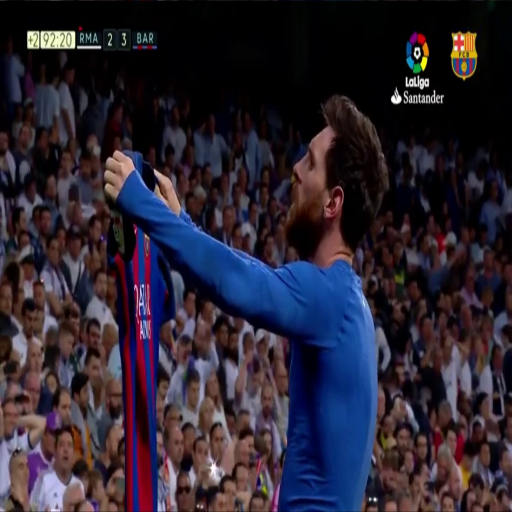

In [41]:
img